<a href="https://colab.research.google.com/github/VictorV1ana/ForecastAbrigoAnimais/blob/master/PROJETO_S%C3%A9ries_Temporais_com_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Previsão de Séries Temporais com o Prophet

Neste projeto, trabalharemos com séries temporais (*time series*) e a ferramenta ***Prophet***. Especificamente, faremos a previsão relacionada ao adoções de animais em um abrigo

Antes de entrar no projeto em si, vamos conhecer o Prophet e o motivo dele ser tão poderoso para lidar com dados temporais.

## Prophet e Séries Temporais
texto by : [Carlos Melo](https://www.linkedin.com/in/carlosfab/)

Fazer boas previsões com dados temporais é uma tarefa altamente complexa. Dada a complexidade dos modelos estatísticos, *time series* representam um desafio para engenheiros de *machine learning*, estatísticos e economistas.

Tentar implementar um modelo sem usar nenhum *framework*, implica entender profundamente uma teoria que não é trivial e que exige um certo grau de especialização.

***Prophet***é um *framework* de forecasting* para séries temporais, disponibilizado como projeto *open source* pelo **Facebook**. Implementado em Python e R, é capaz de realizar previsões automatizadas e rápidas.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/prophet.png" height="300px"></p>

Como nem todos os problemas de *time series* podem ser resolvidos da mesma maneira - e o Prophet foi desenvolvido pensando-se nos problemas internos do Facebook -, é possível que cientistas e analistas de dados otimizem parâmetros do *framework*.

Para ter acesso a documentação oficial do projeto, basta [acessar esta página.](https://facebook.github.io/prophet/). Apesar de não haver muitos projetos e tutoriais, recomenda-se conhecer as customizações possíveis do modelo.

### Modelo Preditivo do Prophet

Como dissemos acima, o Prophet foi feito para solucionar problemas do Facebook. Ou seja, é muito forte para lidar com problemas que tenham características como:

* Dados coletados por um longo período (meses ou anos), e que possuam o maior detalhamento histórico possível.
* Sazonalidades fortes e destacadas.
* Feriados ou datas especiais conhecidas *a priori*.
* Tendência de crescimento não linear, que se aproxima de um limite.

Propeht usa um modelo de séries temporais decomposto, com três componentes principais: tendência, sazonalidade e feriados:

$$
y(t) = g(t) + s(t) + h(t) + \varepsilon_t
$$

onde:

* $g(t)$ é a tendência, que modela as mudanças não-periódicas no valor da série temporal;
* $s(t)$ representa as mudanças periódicas (como sazonalidade semanal, anual, etc);
* $h(t)$ representa os efeitos dos feriados; e
* $\varepsilon_t$ é o erro, as mudanças que não são capturadas pelo modelo (assume-se esse como tendo uma distribuição normal).

Lembrando, os parâmetros que estão definidos como *standard* atendem bem a maioria dos casos. No entanto, caso não tenham um *fit* adequado ao seu problema, esses podem ser ajustados manualmente.


## O Problema de um Abrigo de Animais

O Centro de animais de Austin, no Texas, provê abriga para mais de 16 mil animais por ano, além de outros serviços envolvendo proteção de animais - independente da raça, idade ou estado de saúde desses.

Tendo como principal objetivo "destinar todos os animais possíveis para um novo lar, seja por meio de adoção, assistência social ou grupos de resgate.

Entretando, não é possível encontrar u lar para todos e infelizmente  alguns casos pode ocorrer a eutanásia . A meta do Austin Animal Center é conseguir que o desfecho positivo, ou seja a saída com vida desses animais, seja superior a 90% do total.

Neste projeto, iremos analisar as saídas com vida desses animais. Com essa análise, espera-se que sejamos capazes de identificar um padrão de adoção. Além de fazer previsões.

1. Planejar compras de insumos (remédios, comida, etc);
2. Contratação de funcionários e colaboradores; e
3. Fazer campanhas visando otimizar a adoção de animais.
4. Repetir estratégias vencedoras 
5. Entender o perfil dos animais mais adotados 

### Aquisição dos Dados

Os dados foram disponibilizados pelo [Austin Animal Center](http://www.austintexas.gov/content/austin-animal-center) e podem ser baixados diretamente no [City of Austin Open Data Portal](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238).

O *dataset* usado neste *notebook* foi atualizado em 30 de abril de 2020 e contém **117K linhas** e **12 colunas**.

In [0]:
# importar as bibliotecas necessárias 
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import seaborn as sns 

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot 
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric 

# visualização 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [0]:
#@title
# instalar o pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 532kB 1.7MB/s 


In [0]:
df = pd.read_csv("https://github.com/carlosfab/escola-data-science/blob/master/datasets/shelter_animal_outcomes.csv?raw=true")

# primeiras entradas 
df.head()


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [0]:
# tipo da coluna de tempo 
display(df.DateTime.head())

0    05/08/2019 06:20:00 PM
1    07/18/2018 04:02:00 PM
2    02/13/2016 05:59:00 PM
3    03/18/2014 11:47:00 AM
4    10/18/2014 06:52:00 PM
Name: DateTime, dtype: object

* como é um objeto, vamos mudar para *datetime*

In [0]:
# mudar tipo da variável 
df.DateTime = pd.to_datetime(df.DateTime)

#verificar 
display(df.DateTime.head())

0   2019-05-08 18:20:00
1   2018-07-18 16:02:00
2   2016-02-13 17:59:00
3   2014-03-18 11:47:00
4   2014-10-18 18:52:00
Name: DateTime, dtype: datetime64[ns]

## **Análise Exploratória**

Nessa etapa vamos tentar tirar alguns insights do dataframe

*Disclaimer:*
*Como não temos alguns dados sobre as entradas dos animais somente as saídas, algumas análises ficam limitadas visto que não temos a relação entrada/saida. Então para efeito de hipótese, irei considerar a entrada de animais constante.* 

### Dicionário de Variáveis

* **`Animal ID`** - numero de identificação do animal 

* **`DateTime `**- data e hora de saída do abrigo 

* **`Name`** - nome 

* **`MonthYear`** - aparentemente é a data e hora em pm/am 

* **`Date of Birth`** - data de nascimento 

* **`Outcome Type`** - tipo do "destino"/resultado do animal após entrada 

  * Transfer : *transfrência*          
  * Return to Owner : *retorno para o dono*  
  * Euthanasia : *eutanásia*        
  * Died : *falecimento*              
  * Rto-Adopt : *retornou para o dono pelo processo de adoção*         
  * Disposal           
  * Missing : *animal sumiu do abrigo*             
  * Relocate : *foi realocado para outro lugar*

* **`Outcome Subtype`** - subtipo de Outcome Type 

* **`Animal Type`** - Espécie do Aniamal 
  * Dog : *cachorro*         
  * Cat : *gato*         
  * Other : *outro*        
  * Bird  : *ave*        
  * Livestock - *animais relacionados a pecuária*

* **`Sex upon Outcome`** - O sexo do animal após passagem pelo abrigo 
  * Intact Male: *macho não castrado*
  * Intact Female: *fêmea não castrada*
  * Neutered Male: *macho castrado*    
  * Spayed Female: *fêmea castrada*   
     
    
* **`Age upon Outcome`** - idade na saída do abrigo 

* **`Breed`** - raça 

* **`Color`**- cor 

#### **Resumo Estatístico** 

É uma ferramenta que permite obtermos alguns dos principaís dados estatísticos dos nossos dados e gerar alguns insights. 


In [0]:
# ver o resumo das principais informações estatísticas
df.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,117416,80599,117416,117416,117416,117408,53247,117416,117413,117369,117416,117416
unique,104978,18867,96710,96710,6806,9,22,5,5,50,2568,585
top,A721033,Max,2016-04-18 00:00:00,04/18/2016 12:00:00 AM,09/01/2015,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,525,39,39,117,51722,29119,66777,41234,21150,30746,12337
first,NaN,NaN,2013-10-01 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-04-30 18:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insights:**

* 117 animais nasceram no mesmo dia (4/21/2014	)
* O resultado final da maioria dos animais é a adoção - 51.722 casos de adoção 
* Maioria dos animais são cachorros 66.777
* Após a passagem pelo abrigo a maioria é macho castrado 41.234
* A idade de saída mais frequente é de 1 ano 


In [0]:
# ver resumo do tipos das variáveis e valores não nulos 
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117416 entries, 0 to 117415
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         117416 non-null  object        
 1   Name              80599 non-null   object        
 2   DateTime          117416 non-null  datetime64[ns]
 3   MonthYear         117416 non-null  object        
 4   Date of Birth     117416 non-null  object        
 5   Outcome Type      117408 non-null  object        
 6   Outcome Subtype   53247 non-null   object        
 7   Animal Type       117416 non-null  object        
 8   Sex upon Outcome  117413 non-null  object        
 9   Age upon Outcome  117369 non-null  object        
 10  Breed             117416 non-null  object        
 11  Color             117416 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 10.7+ MB


In [0]:
# verificar os valores ausentes 
df.isnull().sum()

Animal ID               0
Name                36817
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type            8
Outcome Subtype     64169
Animal Type             0
Sex upon Outcome        3
Age upon Outcome       47
Breed                   0
Color                   0
dtype: int64

A maioria dos dados essenciais não tem ou possui poucos valores nulos.

Como de esperado Nome e Outcome Subtype tem alguns valores nulos, muitos animais não tem nome quando resgatados e o outcome pode não ter um subtipo.


#### **Qual é o sexo dos animais ?** 
Para análise iremos desconsiderar os animais que a base de dados não informa o sexo.

In [0]:
# completar valores ausentes com Unknown
df['Sex upon Outcome'].fillna(value='Unknown', inplace= True)

#criar df sem unknown para usar o lambda
df_sex = df[(df['Sex upon Outcome'] !="Unknown")]

#criar nova coluna com sexo
df_sex['sex']= df_sex['Sex upon Outcome'].apply(lambda x: x.split(' ')[1])

In [0]:
# porcentage por sexo 
df_sex.sex.value_counts()/df_sex.shape[0]

Male      0.521142
Female    0.478858
Name: sex, dtype: float64

* Macho - 52,2% 
* Fêmea - 47,8%


Neutered Male    38.277805
Spayed Female    34.415120
Intact Male      13.836414
Intact Female    13.470661
Name: Sex upon Outcome, dtype: float64


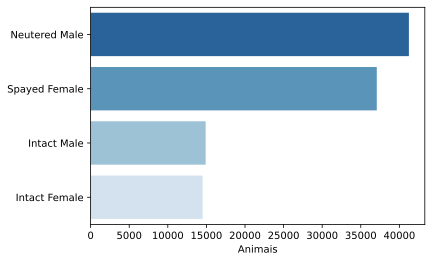

In [0]:
# porcentagem do sexo castrados e não castrados 
print((100*(df_sex["Sex upon Outcome"].value_counts(ascending=False)/df_sex.
                                                                    shape[0])))

#gráfico 
sns.set_style()
sns.countplot(y = df_sex["Sex upon Outcome"], order=["Neutered Male", 
              "Spayed Female", "Intact Male", "Intact Female"], 
              palette = "Blues_r")
plt.ylabel("")
plt.xlabel("Animais")
plt.show()

* **72,6 dos animais são castrados**

#### **Quais são as espécies dos animais ?** 

O abrigo tem diferentes tipos de espécies 
* 56,8% são cachorros 
* 37,4% são gatos 
* 5% outros 
* 0.4% são aves e animais de "pecuária"

In [0]:
# plotar tipo dos animais 
df['Animal Type'].value_counts()/df.shape[0]

Dog          0.568721
Cat          0.374302
Other        0.052208
Bird         0.004616
Livestock    0.000153
Name: Animal Type, dtype: float64

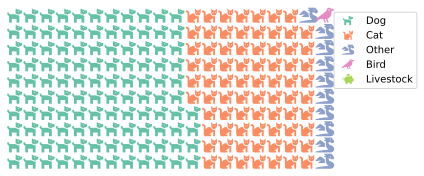

In [0]:
from pywaffle import Waffle
# extrair dados para dicionario
data = df['Animal Type'].value_counts().to_dict()

#plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=10,
                columns=20,
                values=data,
                icon_size=15,
                icons=['dog', 'cat', 'dragon','crow','piggy-bank'],
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )

#### **Quais são os  *Outcome* após passagem no abrigo ?**

* 44% são adotados 
* 29% transferidos
* 17% retornam para os donos

In [0]:
# ver os tipos de outcomes em porcentagem 
100*(df['Outcome Type' ].value_counts(ascending=False)/df.shape[0])

Adoption           44.050215
Transfer           29.716563
Return to Owner    17.575118
Euthanasia          6.719697
Died                0.915548
Rto-Adopt           0.520372
Disposal            0.421578
Missing             0.057062
Relocate            0.017033
Name: Outcome Type, dtype: float64

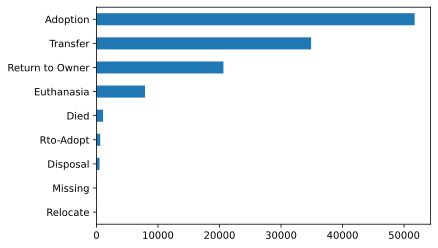

In [0]:
#gráfico de barra 
fig, ax = plt.subplots()
df['Outcome Type' ].value_counts().sort_values(ascending=True).plot(kind='barh'
                                                                        ,ax=ax) 
plt.show();

####**Quantos animais, após passarem pelo abrigo, tem um lar ?**

61.63 % dos animais tem um lar (Adoção ou Retornam para o dono)

In [0]:
# criando variável para adoção ,transferencia ou retorno para o dono  
po =df[(df['Outcome Type']=='Adoption') | (df['Outcome Type']=='Return to Owner'
                                                                    )].shape[0]

# porcentagem de positive outcome 
print("Porcentagem de positive outcomes é : {:.2f} % ".format(100*(po/
                                                                df.shape[0])))

Porcentagem de positive outcomes é : 61.63 % 


#### **Bateram a meta ?**
O abrigo tem como missão que 90% dos animais que passam por ele saiam com vida, 

Esse *DataFrame* informa que **92,36% dos animais tem um destino positivo**.

Então o abrigo bateu sua meta e cumpriu sua missão.

In [0]:
# verificar se bateram a meta
nmeta = df[(df['Outcome Type']=='Euthanasia')| (df['Outcome Type'] =='Died')]

print('Porcentagem dos animais que saíram com vida do abrigo: {:.2f} %'.format(
                                            100*(1-nmeta.shape[0]/df.shape[0])))

Porcentagem dos animais que saíram com vida do abrigo: 92.36 %


#### Quais são os subtipos de *outcome*

In [0]:
#verificar os tipos de outcome subtype 
df['Outcome Subtype'].value_counts()

Partner                29119
Foster                  9255
Rabies Risk             3423
SCRP                    3211
Suffering               3079
Snr                     2558
In Kennel                551
Aggressive               536
Offsite                  383
Medical                  299
In Foster                272
At Vet                   212
Behavior                 154
Enroute                   77
Underage                  29
Court/Investigation       25
In Surgery                22
Possible Theft            16
Field                     11
Prc                        6
Barn                       5
Customer S                 4
Name: Outcome Subtype, dtype: int64

*São vários subtipos de outcome desde para um parceiro do abrigo o um foster care (os mais frequentes) à investigação e em julgamento*

#### **Existe uma idade ideal para a adoção ?**  

Top 10 idades mais adotadas : 

In [0]:
#crira df de adoção 
df_adopt = df[(df['Outcome Type']== "Adoption")]

#plotar idades mais adotadas 
(df_adopt['Age upon Outcome'].value_counts(ascending=False)/df_adopt.shape[0]).head(10)

2 months    0.222575
1 year      0.169038
2 years     0.127779
3 months    0.075519
3 years     0.049979
4 months    0.045397
1 month     0.041162
5 months    0.031940
4 years     0.029001
5 years     0.026604
Name: Age upon Outcome, dtype: float64

**Insights:**

* Apesar da idade de saída do abrigo mais frequente é 1 ano, **a idade de adoção mais frequente é de apenas 2 meses** - cerca de 22% dos animais. 

#### **Quais meses do ano tem mais de adoção?** 

Os meses com maior adoção foram 7, 12, 8 e 6.

Isso pode ter acorrido por diversas razões, **algumas hipóteses seriam:**
* Período de férias escolares de verão nos EUA 
* Final do Ano a adoção de um animal pode ser um presente de natal e na época de maneira geral as pessoas estão mais solidárias.
* Campanhas mais frequentes ou melhor organizadas nesses períodos.

In [0]:
# adiconar coluna mes de adoção 
df_adopt['month'] = df_adopt.DateTime.dt.month

#plotar meses com maior adoção em porcentagem 
df_adopt.month.value_counts(ascending=False)/df_adopt.shape[0]

7     0.102877
12    0.097889
8     0.097057
6     0.091972
10    0.089362
1     0.084258
11    0.083407
9     0.080005
5     0.073218
2     0.073044
3     0.069081
4     0.057828
Name: month, dtype: float64

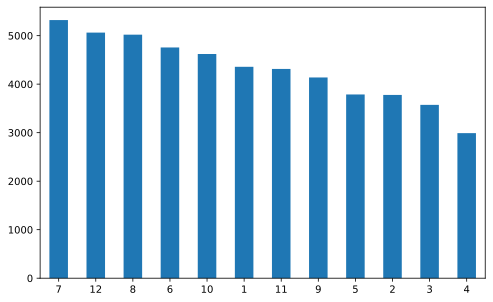

In [0]:
#plotar gráfico
fig,ax =  plt.subplots(figsize=(8,5))
df_adopt.month.value_counts(ascending=False).plot(kind="bar",ax=ax)
plt.xticks(rotation=360)

plt.tight_layout;

####**Perídos com maior número de doações:**

Analisando os períodos de adoação, podemos provomover ações parecidas para ter melhores resultados.

* Perídos que tiveram maiores números de adoção:

In [0]:
# meses com maior número de adoções  
adoptions_df.resample('M').sum().sort_values('outcomeCount', ascending=False).head(10)

,outcomeCount
DateTime,
2019-06-30,1017
2019-08-31,996
2016-07-31,985
2018-08-31,914
2014-07-31,907
2015-07-31,896
2019-12-31,881
2017-07-31,867
2019-07-31,859


### **Análise da Time Series** 
Nela focaremos no caso de adoção 

In [0]:
# apenas adoção 
adoptions_df = df[(df['Outcome Type'] == 'Adoption')]
adoptions_df['outcomeCount'] = 1

adoptions_df = adoptions_df[['DateTime', 'outcomeCount']]
adoptions_df = adoptions_df.set_index('DateTime').sort_index()
adoptions_df.head()

,outcomeCount
DateTime,
2013-10-01 09:31:00,1
2013-10-01 11:42:00,1
2013-10-01 11:53:00,1
2013-10-01 11:53:00,1
2013-10-01 15:47:00,1


In [0]:
#ver as datas mínimas e máximas 
adoptions_df.index.min(), adoptions_df.index.max()

(Timestamp('2013-10-01 09:31:00'), Timestamp('2020-04-30 14:41:00'))

**Gráfico de doações por dia**

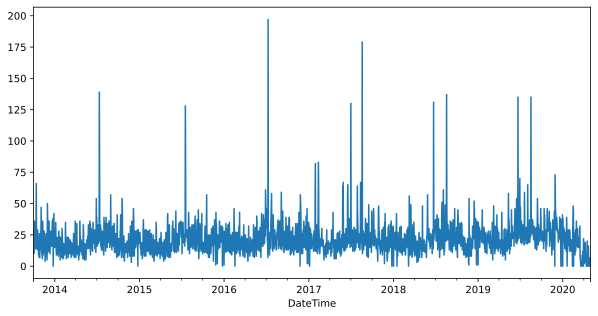

In [0]:
# plotar o gráfico diário 
fig , ax = plt.subplots(figsize=(10,5))
adoptions_df.resample('D').sum().plot(ax=ax, legend= False)
plt.show()

* Existe uma certa constância com picos em datas que se encontam no meio do ano.

####**Datas com maior número de doações:**

Se nessas datas foram feitas campanhas e eventos de adoção, seria interessante o abrigo mapear as estratégias utilizadas para tentar replicar.

In [0]:
#datas com maior número de adoção 
adoptions_df.resample('D').sum().sort_values('outcomeCount', ascending=False).head(10)

,outcomeCount
DateTime,
2016-07-09,197
2017-08-19,179
2014-07-12,139
2018-08-18,137
2019-06-22,135
2019-08-17,135
2018-06-23,131
2017-07-01,130
2015-07-18,128


* 5 dos 10 dias com maior adoção foram no mês de julho 
* Todas as Datas estão nos meses mais quentes e em período de férias 


#### **Picos de adoção**
**Como foi observado anteriormente no meio do ano estão os picos de adoção :**

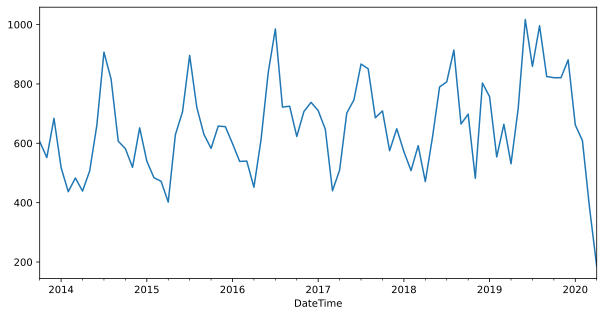

In [0]:
#plotar gráfico semnal 
fig, ax = plt.subplots(figsize=(10,5))
adoptions_df.resample('M').sum().plot(ax=ax, legend=False)
plt.show()

##Forecasting

### Preparar os Dados para o Prophet

Para trabalhar com o Prophet devemos criar uma coluna ds com as datas e y com a informação alvo.

In [0]:
# trabalhar com dados diários 
prophet_df = adoptions_df.resample('D').sum().reset_index().rename(columns={
                                          'DateTime':'ds', 'outcomeCount':'y'})
# ver primeiras entradas 
prophet_df.head()

,ds,y
0,2013-10-01,11
1,2013-10-02,16
2,2013-10-03,10
3,2013-10-04,11
4,2013-10-05,36


### Criar o Modelo de Forecasting



#### Modelo Diário

In [0]:
# instaciar e treinar o modelo 
model= Prophet()
model.add_country_holidays(country_name='US')
model.fit(prophet_df)

#determinar o perído de dias para previsão 
future = model.make_future_dataframe(periods=365)

# fazer a previsão do perído 
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


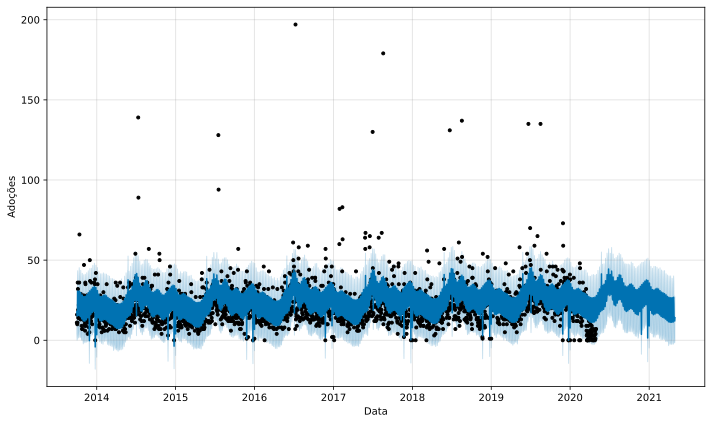

In [0]:
# visualisar o gráfico com as previsões 
model.plot(forecast, xlabel ='Data', ylabel ='Adoções');

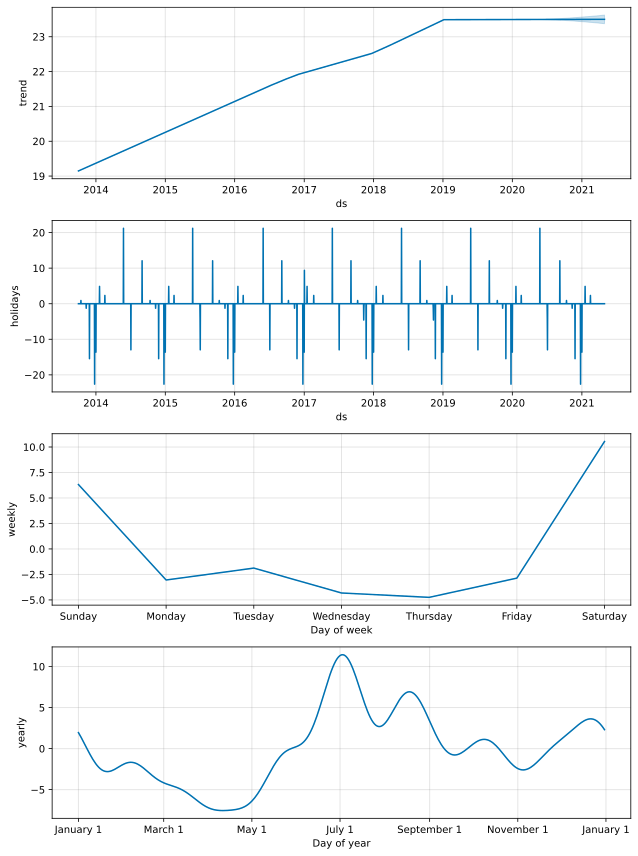

In [0]:
# separar componentes 
model.plot_components(forecast);

**Insights:** 
* As adoções estão em crescimento 
* Os dias de maior adoção são Sábado , Domingo e **Terça-Feira**.
* A partir de maio as adoções comçam a crescer e **atingem seu pico em julho**, as possíveis razões desse aumento foram mencionadas anteriormente.

#### Modelo Semanal

In [0]:
# criar um modelo semanal
prophet_df2 = adoptions_df.resample('W').sum().reset_index().rename(columns={
                                          'DateTime':'ds', 'outcomeCount':'y'})

# instaciar e treinar o modelo 
model2 = Prophet()
model2.add_country_holidays(country_name='US')
model2.fit(prophet_df2)

# setar o periodo de previsão 
future2 = model2.make_future_dataframe(periods=365)

#realizar a previsão para o período estabelecido 
forecast2 = model2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


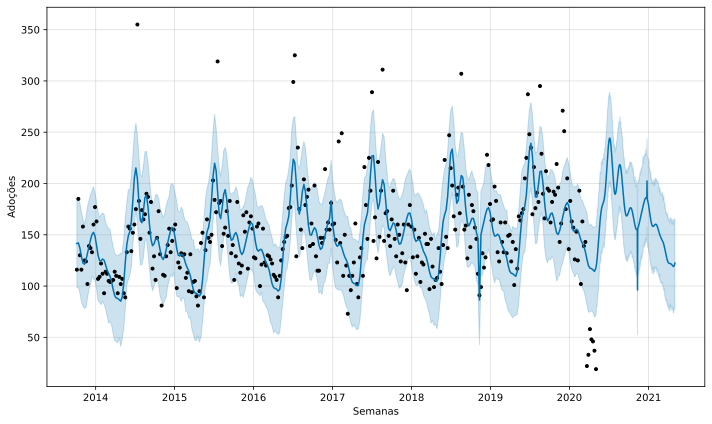

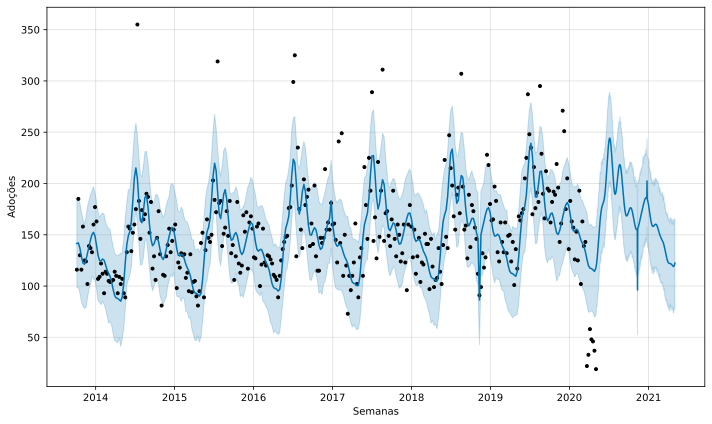

In [0]:
#visualizar gráfico 
model2.plot(forecast2,xlabel='Semanas',ylabel='Adoções')

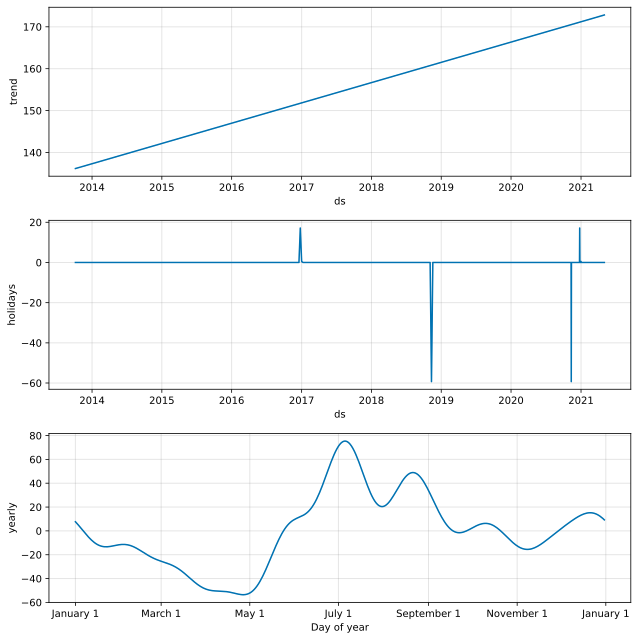

In [0]:
# separar os componentes 
model2.plot_components(forecast2);

#### Vizualisação Otimizada 

O prophet possui um sistema de plots muito bom e simples, porém na minha visão as vezes pode ser um pouco confuso. 

Entaão irei plotar um gráfico de linhas com o forecast e os dados originais, para isso iremos:

1. Colocar os dataframes com memso índicie 
2. Juntar os dados com a previsão em um dataframe 
3. Plotar o gráfico 

In [0]:
# df original e o forecast com mesmo indice 
prophet_df2.set_index('ds', inplace=True)
forecast2.set_index('ds', inplace = True)

# juntar os dataframes 
prophet_df2 = prophet_df2.join(forecast2[['yhat', 'yhat_lower','yhat_upper']], 
                                                                how = 'outer')

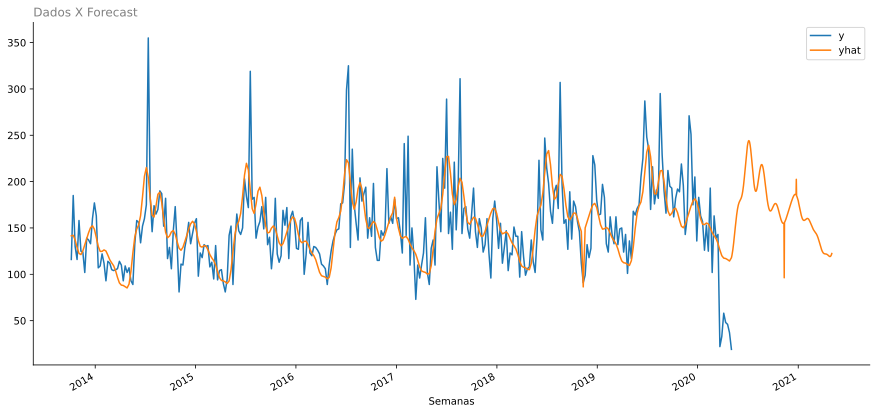

In [0]:
#plotar o gráfico 
fig, ax = plt.subplots(figsize=(15,7))
prophet_df2[['y', 'yhat']].plot(ax=ax)

# mudar visuais 
plt.title("Dados X Forecast",loc='left', color ='gray')
plt.xticks
plt.xlabel("Semanas")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

Insights:

* Percebemos que o modelo de maneira geral consegue acompanhar e prever bem, entretanto, em momentos de pico ele tem muito pouca precisão.

### Avaliação do Modelo de Séries Temporais
Para isso iremos utilizar cross validation e a medida principal será a mdAPE.

#### Modelo Diário

In [0]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-10-30 12:00:00 and 2019-05-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-31,15.595742,4.062798,27.746618,16,2016-10-30 12:00:00
1,2016-11-01,16.120902,5.418881,28.184999,16,2016-10-30 12:00:00
2,2016-11-02,14.068885,2.733845,25.760828,13,2016-10-30 12:00:00
3,2016-11-03,13.692068,2.244996,24.689524,21,2016-10-30 12:00:00
4,2016-11-04,14.611005,2.769672,25.702672,26,2016-10-30 12:00:00


In [0]:
from fbprophet.diagnostics import performance_metrics 
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,36 days 12:00:00,96.537963,9.825373,7.186419,0.262747,0.844749
1,37 days 00:00:00,96.422144,9.819478,7.172768,0.262747,0.844749
2,37 days 12:00:00,97.372306,9.867741,7.265063,0.268853,0.844749
3,38 days 00:00:00,96.863575,9.841929,7.246640,0.269114,0.844749
4,38 days 12:00:00,96.506757,9.823785,7.218155,0.268853,0.849315


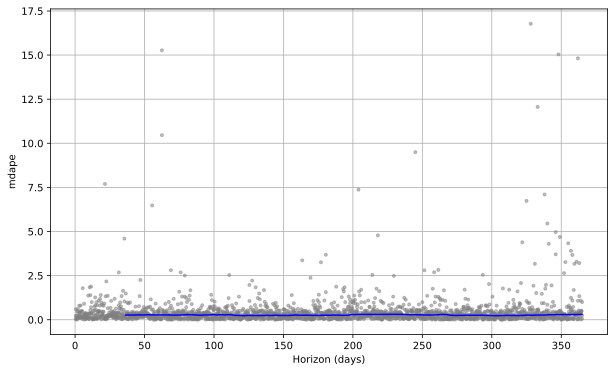

In [0]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')

**Avaliação:** 
* O modelo tem a mdAPE de 26% valor alto que, entretanto, é relativamente normal visto que fazer previsões diárias é algo extremamente difícil de obter uma acurácia alta.

#### Modelo Semanal

In [0]:
# cross modelo semanal 
df_cv2 = cross_validation(model2,horizon='365 days')
df_cv2.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-11-02 12:00:00 and 2019-05-04 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-11-06,128.477746,94.040222,161.754028,147,2016-11-02 12:00:00
1,2016-11-13,135.094357,103.833292,169.366609,142,2016-11-02 12:00:00
2,2016-11-20,145.911557,114.156325,181.659902,147,2016-11-02 12:00:00
3,2016-11-27,152.806829,120.816242,184.907494,214,2016-11-02 12:00:00
4,2016-12-04,154.453922,119.614321,188.979705,155,2016-11-02 12:00:00


In [0]:
# metricas de avaliação 
df_p2 = performance_metrics(df_cv2)
df_p2.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 00:00:00,962.230840,31.019846,25.171100,0.184930,0.157037,0.709677
1,36 days 12:00:00,987.898130,31.430847,25.950964,0.190919,0.167184,0.709677
2,37 days 00:00:00,980.644633,31.315246,25.792135,0.188074,0.157037,0.709677
3,37 days 12:00:00,1131.353693,33.635602,27.480891,0.207520,0.167184,0.677419
4,38 days 00:00:00,1138.537022,33.742214,27.727526,0.209272,0.167184,0.677419


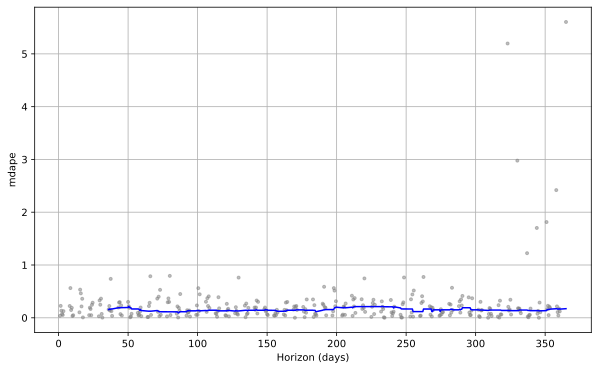

In [0]:
# gráfico 
plot_cross_validation_metric(df_cv2, metric='mdape');

**Avaliação:** 
* Modelo possui métricas melhores do que o o diário com mdape de aproximadamente 16% **melhora significativa porém ainda não ideal, mas pode ser usado como baseline.**


## **Conclusão**

Conseguimos estrair várias informações estratégicas sobre o abrigo e principalmente sobre adoção. 

Com elas, o marketing e o financeiro, por exemplo, podem se planejar melhor gerando mais adoções e menos custos.

Nossa previsão teve uma performace boa porém não excelente, pode ser vir de baseline. Com o tratamento de *outliers* podemos melhorar sua performace, principalmente em picos e vales.